# 06 - Regularization


Let's get started by importing all the libraries you will need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


Now, you will create some data to illustrate our point. Run the following cell to create them:

In [2]:
np.random.seed(0)

X = np.arange(-10, 10, 0.4) + np.random.normal(0, 0.5, 50)
y = X + 3 * (X ** 2) - 2 * (X ** 3) + np.random.normal(0, 300, 50)


You have your dataset: an array `X` which is our single feature and `y` which is the true values.

Your first task is to plot these data:

In [3]:
# Your code here


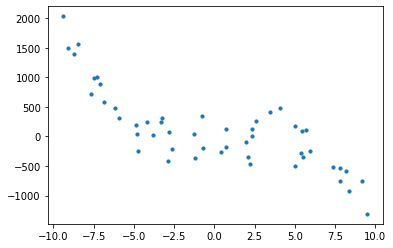

In [4]:
plt.scatter(X, y, s=10)

Try to split your dataset into a training set and a test set (with `test_size=0.3` and `random_state=42`):

In [5]:
# Your code here


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Run the following cells to check your answer:

In [7]:
X_train[12]
# You should get array([0.70640807])

0.7064080749870928

In [8]:
X_test[7]
# You should get array([-0.72718284])

-0.7271828372993735

In [9]:
y_train[23]
# You should get -364.2924005611124

-364.2924005611124

In [10]:
y_test[2]
# You should get -352.4521126837309

-352.4521126837309

You also need to reshape your `X_train` and `X_test` because Sklearn models don't like when `X` is a 1D array:

In [11]:
# Your code here


In [12]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Check your answer with the following cells:

In [13]:
X_train.shape
# You should get (35, 1)

(35, 1)

In [14]:
X_test.shape
# You should get (15, 1)

(15, 1)

Now, you are ready to try a first model with the data. Let's start with a linear regression. You have to:

- Instanciate the model
- Fit the model on training data
- Predict values from testing data

You should end up with a variable `y_pred` which is the array containing the estimated values.

In [15]:
# Your code here

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

To check your answer, feel free to run the following cells:

In [17]:
y_pred[9]
# Your should get 428.9387120753156

428.9387120753156

You can now plot your regression line along with the data.

In [18]:
# Your code here


(-2000, 2200)

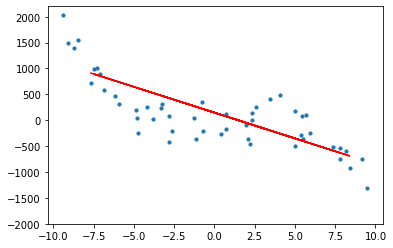

In [20]:
plt.scatter(X, y, s=10)
plt.plot(X_test, y_pred, color='r')
plt.ylim(-2000, 2200)

You can see that a line can't do the job here. Let's calculate the score of the model. With linear regression, the metric returned by the `score()` function is the $r^2$ (more details [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)).


In [21]:
# Your code here


In [22]:
model.score(X_test, y_test)


0.38396755192273035

You should get a score of 0.38396755192273035.

This is not very good. We can't fit a line because our data are not linear. They follow a polynomial pattern. One method is to use polynomial features as we described at the beginning. You don't need to do it manually: you can use Sklearn ([here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
)). You can also have a look [here](https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn#answer-124664
) and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py).

Your task is to create variables `X_train_poly` and `X_test_poly` containing the polynomials. Instanciate `PolynomialFeatures` with `degree=2`. This means that we want to add one column with the data samples raised at the power of 2.

In [23]:
# Your code here


In [24]:
polynomial_features= PolynomialFeatures(degree=2)

X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)


Checking time. You can run the following cells:

In [25]:
X_train_poly.shape
# You should get (35, 3)

(35, 3)

In [26]:
X_train_poly[23, 2]
# You should get 1.371434245703858

1.371434245703858

In [27]:
X_test_poly[4, 2]
# You should get 10.907028922348374

10.907028922348374

If you look at the created arrays (for instance `X_train_poly[:10, :]`), you can see that the first column is filled with ones. This because when we use `degree=2`, we have all powers from 0 to 2 (included): this results in ones (any number raised at a power of 0), our data and our data squared for the columns 0, 1, and 2 respectively.

Now, you can use these new data in the linear regression algorithm as it was real features. Try to create a new model with these data.

In [28]:
# Your code here


In [29]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To be sure, run the following cell:

In [30]:
model.coef_
# You should get array([  0.        , -97.95476316,   4.98207551])

array([  0.        , -97.95476316,   4.98207551])

To plot the new regression "line" (quoted because it is not a line anymore):

- Create an array with range of values
- Pass this array into the function polynomial features and store this into a variable named `X_plot` for instance
- Do predictions with your model from this array
- Plot the column 1 of `X_plot` as x and the predictions as y

In [31]:
# Your code here


(-2000, 2200)

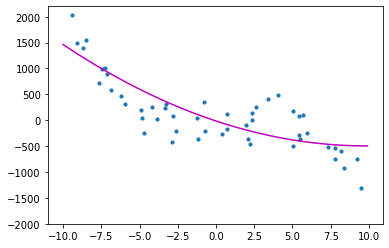

In [33]:
X_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(X_plot)

plt.scatter(X, y, s=10)
plt.plot(X_plot[:, 1], y_plot, color='m')
plt.ylim(-2000, 2200)

Let's calculate the score with this new model:

In [34]:
# Your code here


In [35]:
model.score(X_test_poly, y_test)


0.4512171920971

You should see a better score. Do these same steps but using `degree=3` in polynomial features. What is the score?

In [36]:
# Your code here


(-2000, 2200)

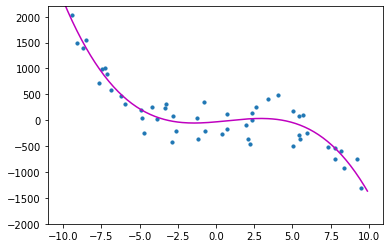

In [37]:
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_poly_pred = model.predict(X_train_poly)

x_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(x_plot)

plt.scatter(X, y, s=10)
plt.plot(x_plot[:, 1], y_plot, color='m')
plt.ylim(-2000, 2200)

In [38]:
model.score(X_test_poly, y_test)

0.7951178164746361

You should observe that the fit looks better. Do the same plot with a degree of 10.

In [39]:
# Your code here


(-2000, 2200)

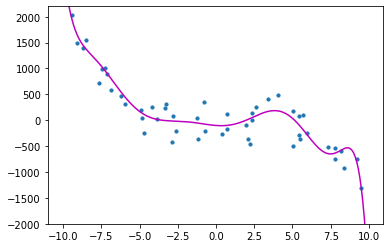

In [40]:
polynomial_features= PolynomialFeatures(degree=10)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_poly_pred = model.predict(X_train_poly)

x_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(x_plot)

plt.scatter(X, y, s=10)
plt.plot(x_plot[:, 1], y_plot, color='m')
plt.ylim(-2000, 2200)

Now the fit is very good. However, it is *too* good. It looks like it fits even part of the noise. This is overfitting. Let's check with the score (on the test set as before).

In [41]:
# Your code here


In [42]:
model.score(X_test_poly, y_test)

0.7631161212590836

`degree=3` was better.

To get the best results, we can have a bit of overfitting and apply regularization to fix it. To do that, you can use `degree=8` for instance, but instead of using `LinearRegression`, use the function `Ridge` from Sklearn (already imported). You can provide the alpha parameter which is the regularization parameter. Your task is now to find alpha associated with better results than with `degree=3`.


In [43]:
# Your code here


(-2000, 2200)

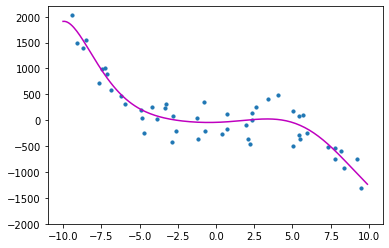

In [44]:
polynomial_features= PolynomialFeatures(degree=8)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model = Ridge(alpha=150)
model.fit(X_train_poly, y_train)
y_poly_pred = model.predict(X_train_poly)

x_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(x_plot)

plt.scatter(X, y, s=10)
plt.plot(x_plot[:, 1], y_plot, color='m')
plt.ylim(-2000, 2200)

In [45]:
model.score(X_test_poly, y_test)

0.7983634979210381

We managed to get a score of 0.7983634979210381. Try to beat us by playing with `alpha` and the `degree` of polynomials.

The improvement is low, but in some case, using regularization can be game changing especially with techniques where we can't change the algorithm to fit the data with less precision like we did by playing with the `degree`.

Finally, you can try to look at the effect of regularization on the weights given for each features (that is, each polynomial). To do that, you can loop over different values of the regularization parameter `alpha`. Since this parameter can be very large and positive or negative, you can use a logspace to explore the values:

In [46]:
alphas = np.logspace(-1, 4, 200)

Store the scores corresponding to each value of `alpha` and the model weights (`model.coef_`). Then, you can do two plots:

- the weights in function of alpha (you can use a log scale for the x-axis: `plt.xscale('log')`)
- the score in function of alpha (you can use a log scale as well)

In [47]:
# Your code here


In [48]:
coefs = []
scores = []
scores_tr = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_poly, y_train)
    scores.append(model.score(X_test_poly, y_test))
    scores_tr.append(model.score(X_train_poly, y_train))
    coefs.append(model.coef_)

/Users/hadrien/.local/share/virtualenvs/prep_exo_lewagon-fcgnGGPf/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20968e-18): result may not be accurate.
  overwrite_a=True).T
/Users/hadrien/.local/share/virtualenvs/prep_exo_lewagon-fcgnGGPf/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69865e-18): result may not be accurate.
  overwrite_a=True).T
/Users/hadrien/.local/share/virtualenvs/prep_exo_lewagon-fcgnGGPf/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.21674e-18): result may not be accurate.
  overwrite_a=True).T
/Users/hadrien/.local/share/virtualenvs/prep_exo_lewagon-fcgnGGPf/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.7657e-18): result may not be accurate.
  overwrite_a=True).T
/Users/hadrien/.local/share/virtualenvs/prep_exo_

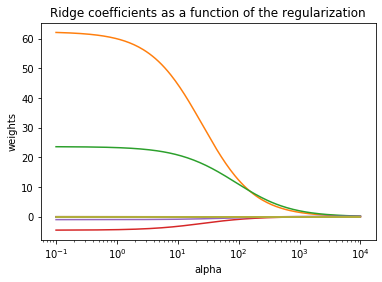

In [49]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

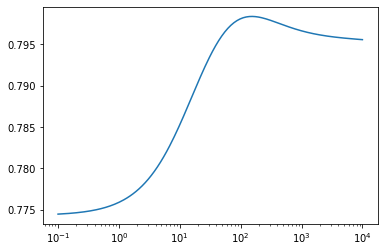

In [50]:
plt.plot(alphas, scores)
plt.xscale('log')